# ONLINE NEWS POPULARITY PREDICTION

 ## PROBLEM STATEMENT

The rise of digital media has led to a massive influx of online news articles, but not all articles gain the same level of popularity.
Some go viral, while others struggle to attract readers. The challenge lies in understanding the key factors that contribute to an article’s success.
This project aims to build a predictive model that estimates the number of times an article will be shared based on various features, including textual
properties, social engagement metrics, and content attributes. By leveraging machine learning, we seek to provide insights into what makes an article 
widely shared.

## Problem Description

Online news platforms generate a large volume of content daily, but only a fraction of articles achieve significant engagement.
Various factors, such as textual properties, publication time, and social media interactions, influence an article's popularity.
This project utilizes a dataset from the UCI Machine Learning Repository to analyze these factors and uncover patterns that contribute 
to higher shareability. By addressing challenges like feature selection, data skewness, and model optimization, we aim to develop a robust
predictive system for news article popularity.

## Project Objective

The objective of this project is to build a machine learning model that accurately predicts the number of times an article will be shared. 
This involves data preprocessing, feature selection, and training multiple regression models, including Linear Regression, Decision Tree, Random Forest,
Gradient Boosting, and Support Vector Regressor. The models will be evaluated using performance metrics like R-squared, Mean Absolute Error (MAE), 
and Mean Squared Error (MSE) to determine the most effective approach. Finally, the best-performing model will be fine-tuned and deployed to assist
content creators and publishers in optimizing their articles for greater audience engagement.

## Dataset Information
- *Source:* UCI Machine Learning Repository
- *Features:* The dataset consists of 17 columns, including numerical and categorical attributes such as article length, keyword frequency, and social shares.
- *Target Variable:* Popularity score of the article.


# Load dataset only once
file_path = "C:\\Users\\uw\\Downloads\\MAIN ONLINE NEWS POPULARITY.csv"
df = pd.read_csv(file_path)
print("Dataset shape after loading:", df.shape)
```

In [5]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import StandardScaler
import json
from sklearn.utils.validation import check_is_fitted



In [7]:
# Load dataset
dataset_url = (r"C:\Users\uw\Downloads\MAIN ONLINE NEWS POPULARITY.csv")
df = pd.read_csv(dataset_url)

In [9]:
# Print initial dataset shape
print("Dataset shape after loading:", df.shape)
print("Available columns:",df.columns)

Dataset shape after loading: (39644, 17)
Available columns: Index(['url', ' kw_avg_min', ' kw_avg_max', ' kw_max_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_02', ' LDA_03',
       ' global_subjectivity', ' avg_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares'],
      dtype='object')


In [11]:
#Remove unnecessary columns if present
df = df.drop(columns=["unnecessary_column"], errors="ignore")

In [13]:
#Handling missing values
df = df.dropna()

In [15]:
#Remove non-numeric characters from column names
df.columns = df.columns.str.replace(r'\xa0', '', regex=True).str.strip()

In [17]:
#Feature Selection - Removing highly correlated features 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

In [20]:
#Identify and remove highly correlated features
threshold = 0.85
corr_features = set()
for col in correlation_matrix.columns:
    high_corr = correlation_matrix[col][correlation_matrix[col] > threshold].index.tolist()
    high_corr.remove(col) if col in high_corr else None
    corr_features.update(high_corr)

print("Highly Correlated Features to Remove:", corr_features)
df_filtered = df.drop(columns=corr_features)

Highly Correlated Features to Remove: {'self_reference_max_shares', 'self_reference_avg_sharess'}


In [22]:
print("Numeric columns in df_filtered:", df_filtered.columns)
print("Expected numeric columns:",numeric_cols)

Numeric columns in df_filtered: Index(['url', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'self_reference_min_shares', 'LDA_02', 'LDA_03', 'global_subjectivity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')
Expected numeric columns: Index(['kw_avg_min', 'kw_avg_max', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_02',
       'LDA_03', 'global_subjectivity', 'avg_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')


In [24]:
numeric_cols = [col for col in numeric_cols if col in df_filtered.columns]

In [26]:
numeric_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [27]:
#Handling Skewness
skewed_features = df_filtered[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewness of numeric features:\n", skewed_features)

Skewness of numeric features:
 shares                          33.962600
kw_avg_min                      31.304924
self_reference_min_shares       26.263370
kw_max_avg                      16.411049
abs_title_sentiment_polarity     1.704129
LDA_02                           1.311645
LDA_03                           1.238669
title_subjectivity               0.816054
kw_avg_max                       0.624286
title_sentiment_polarity         0.396094
avg_negative_polarity           -0.551623
abs_title_subjectivity          -0.624126
global_subjectivity             -1.372637
max_negative_polarity           -3.459616
dtype: float64


In [30]:
#Apply PowerTransformer for skewed features
transformer = PowerTransformer(method='yeo-johnson')
df_filtered[numeric_cols] = transformer.fit_transform(df_filtered[numeric_cols])

In [32]:
# Univariate Analysis
def univariate_analysis(data):
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Univariate Analysis: {col}')
        plt.show()  

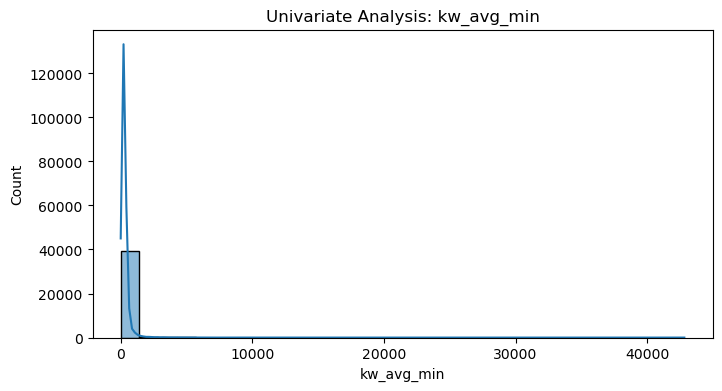

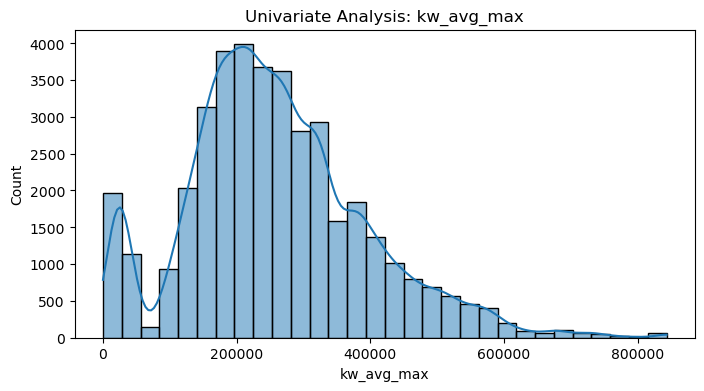

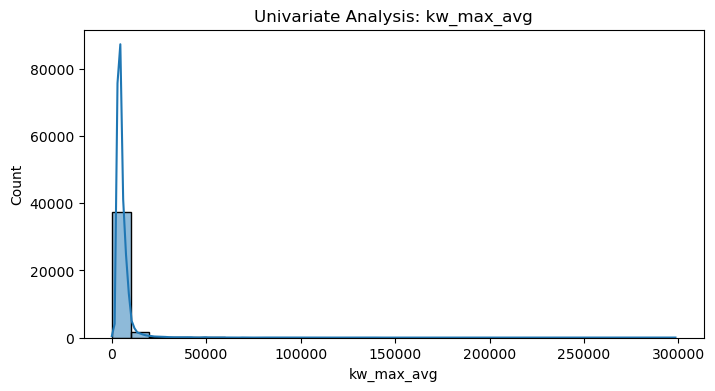

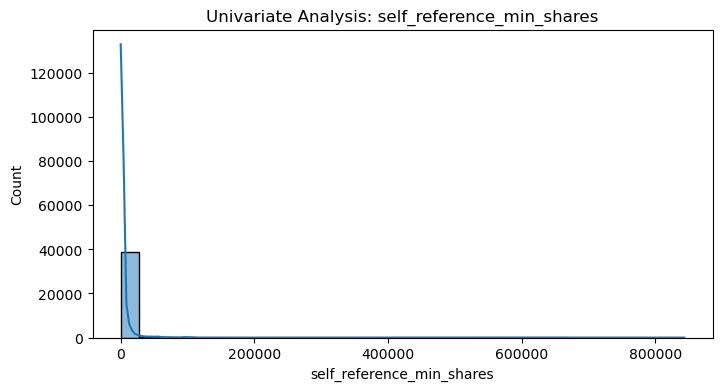

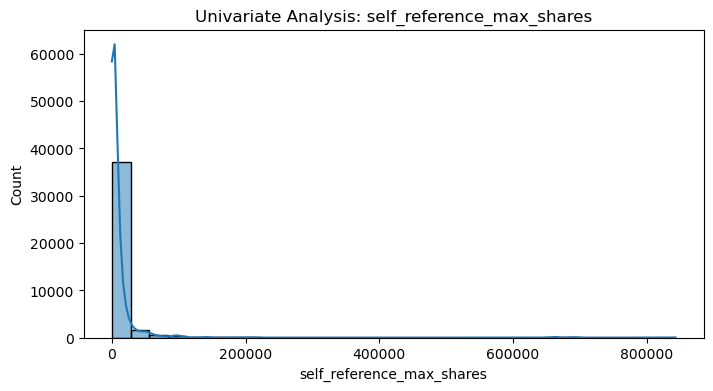

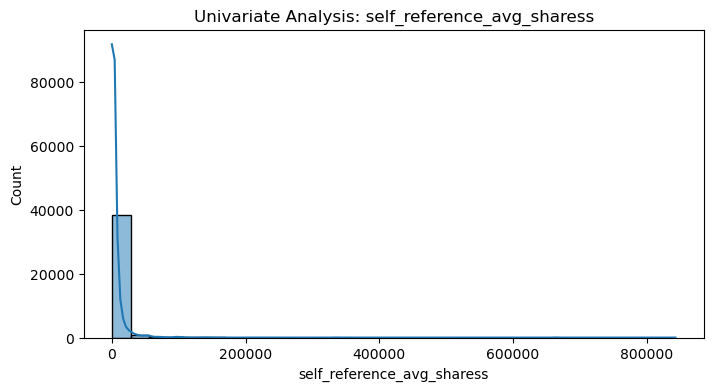

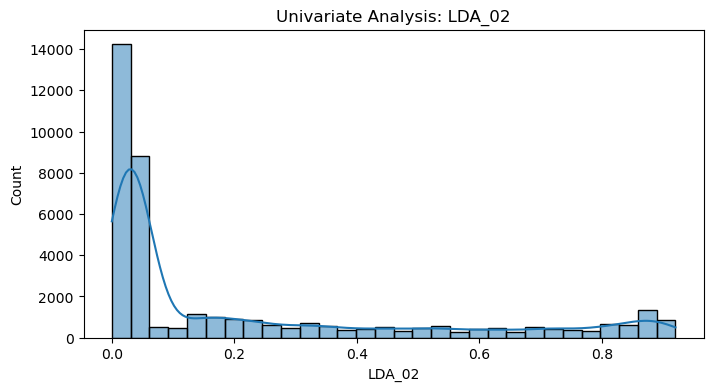

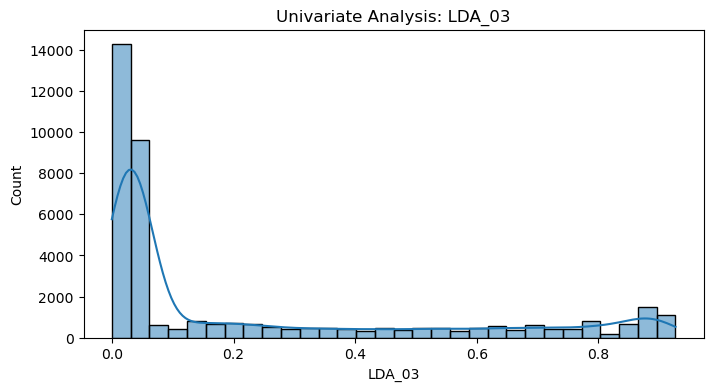

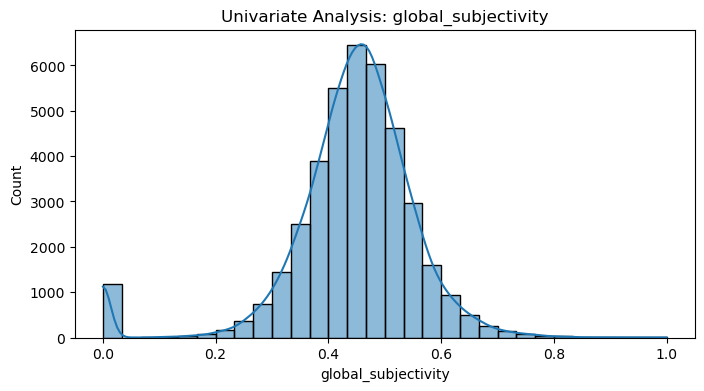

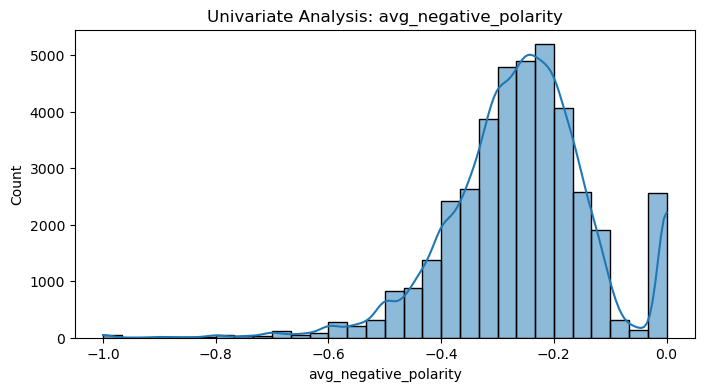

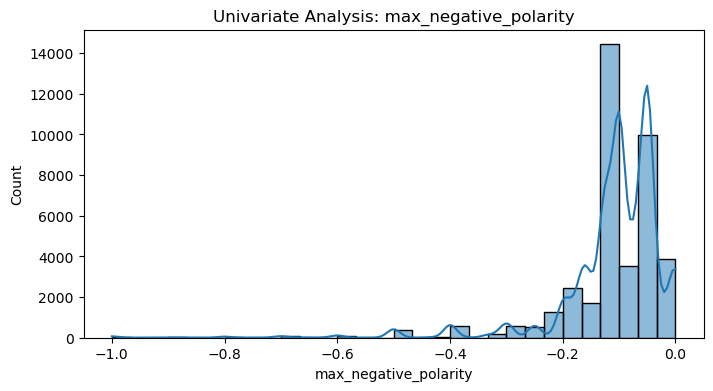

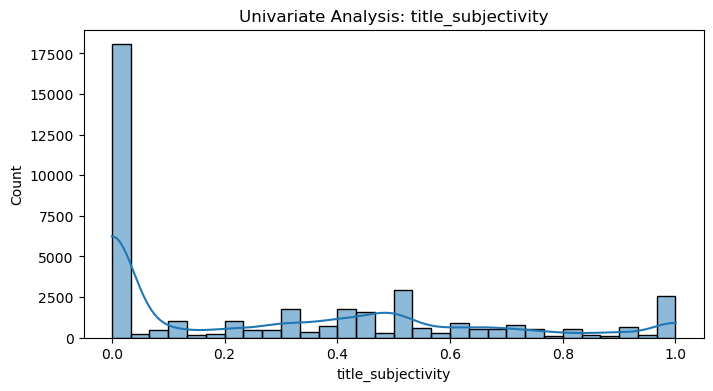

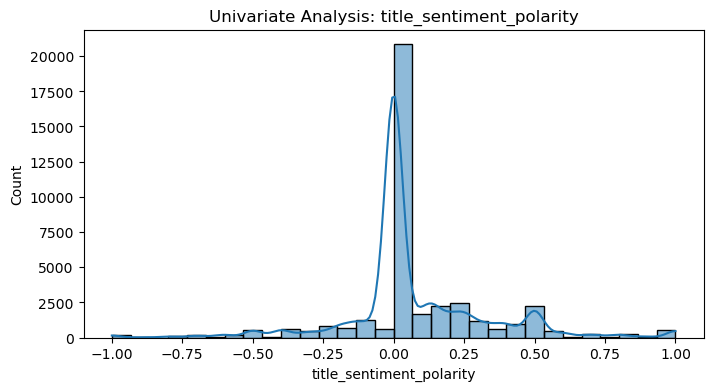

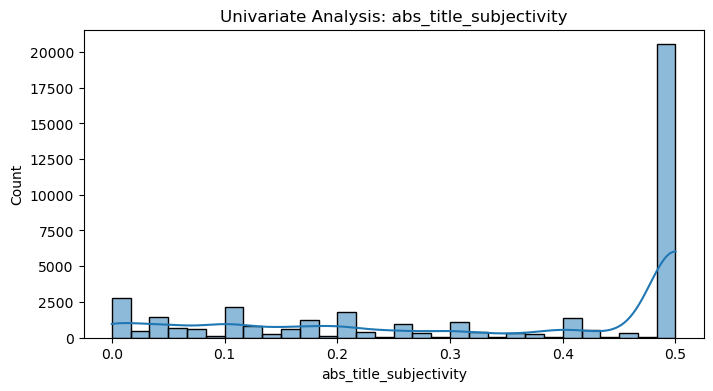

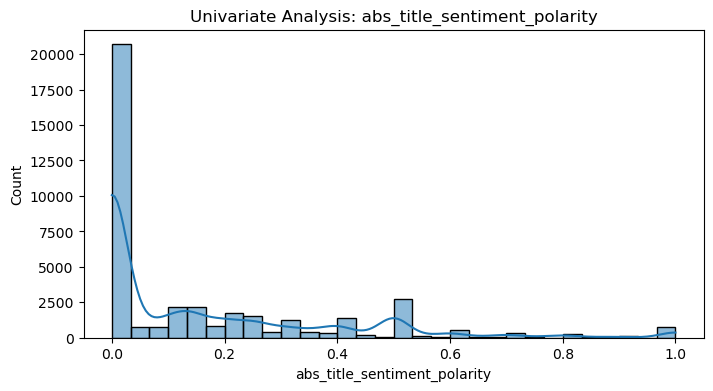

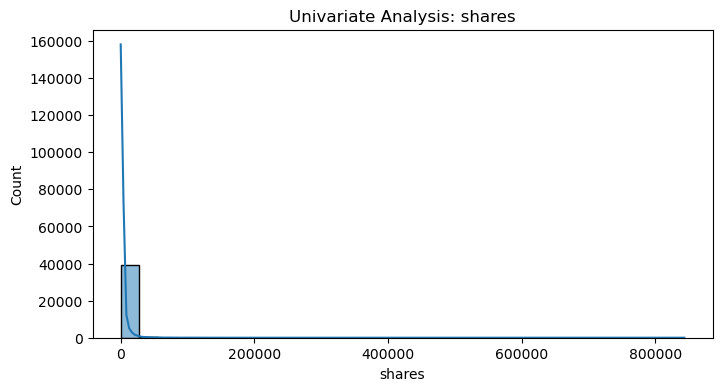

In [33]:
# Perform Univariate Analysis
univariate_analysis(df)

In [37]:
# Bivariate Analysis
def bivariate_analysis(data):
 sns.pairplot(data, diag_kind='kde')
plt.show()

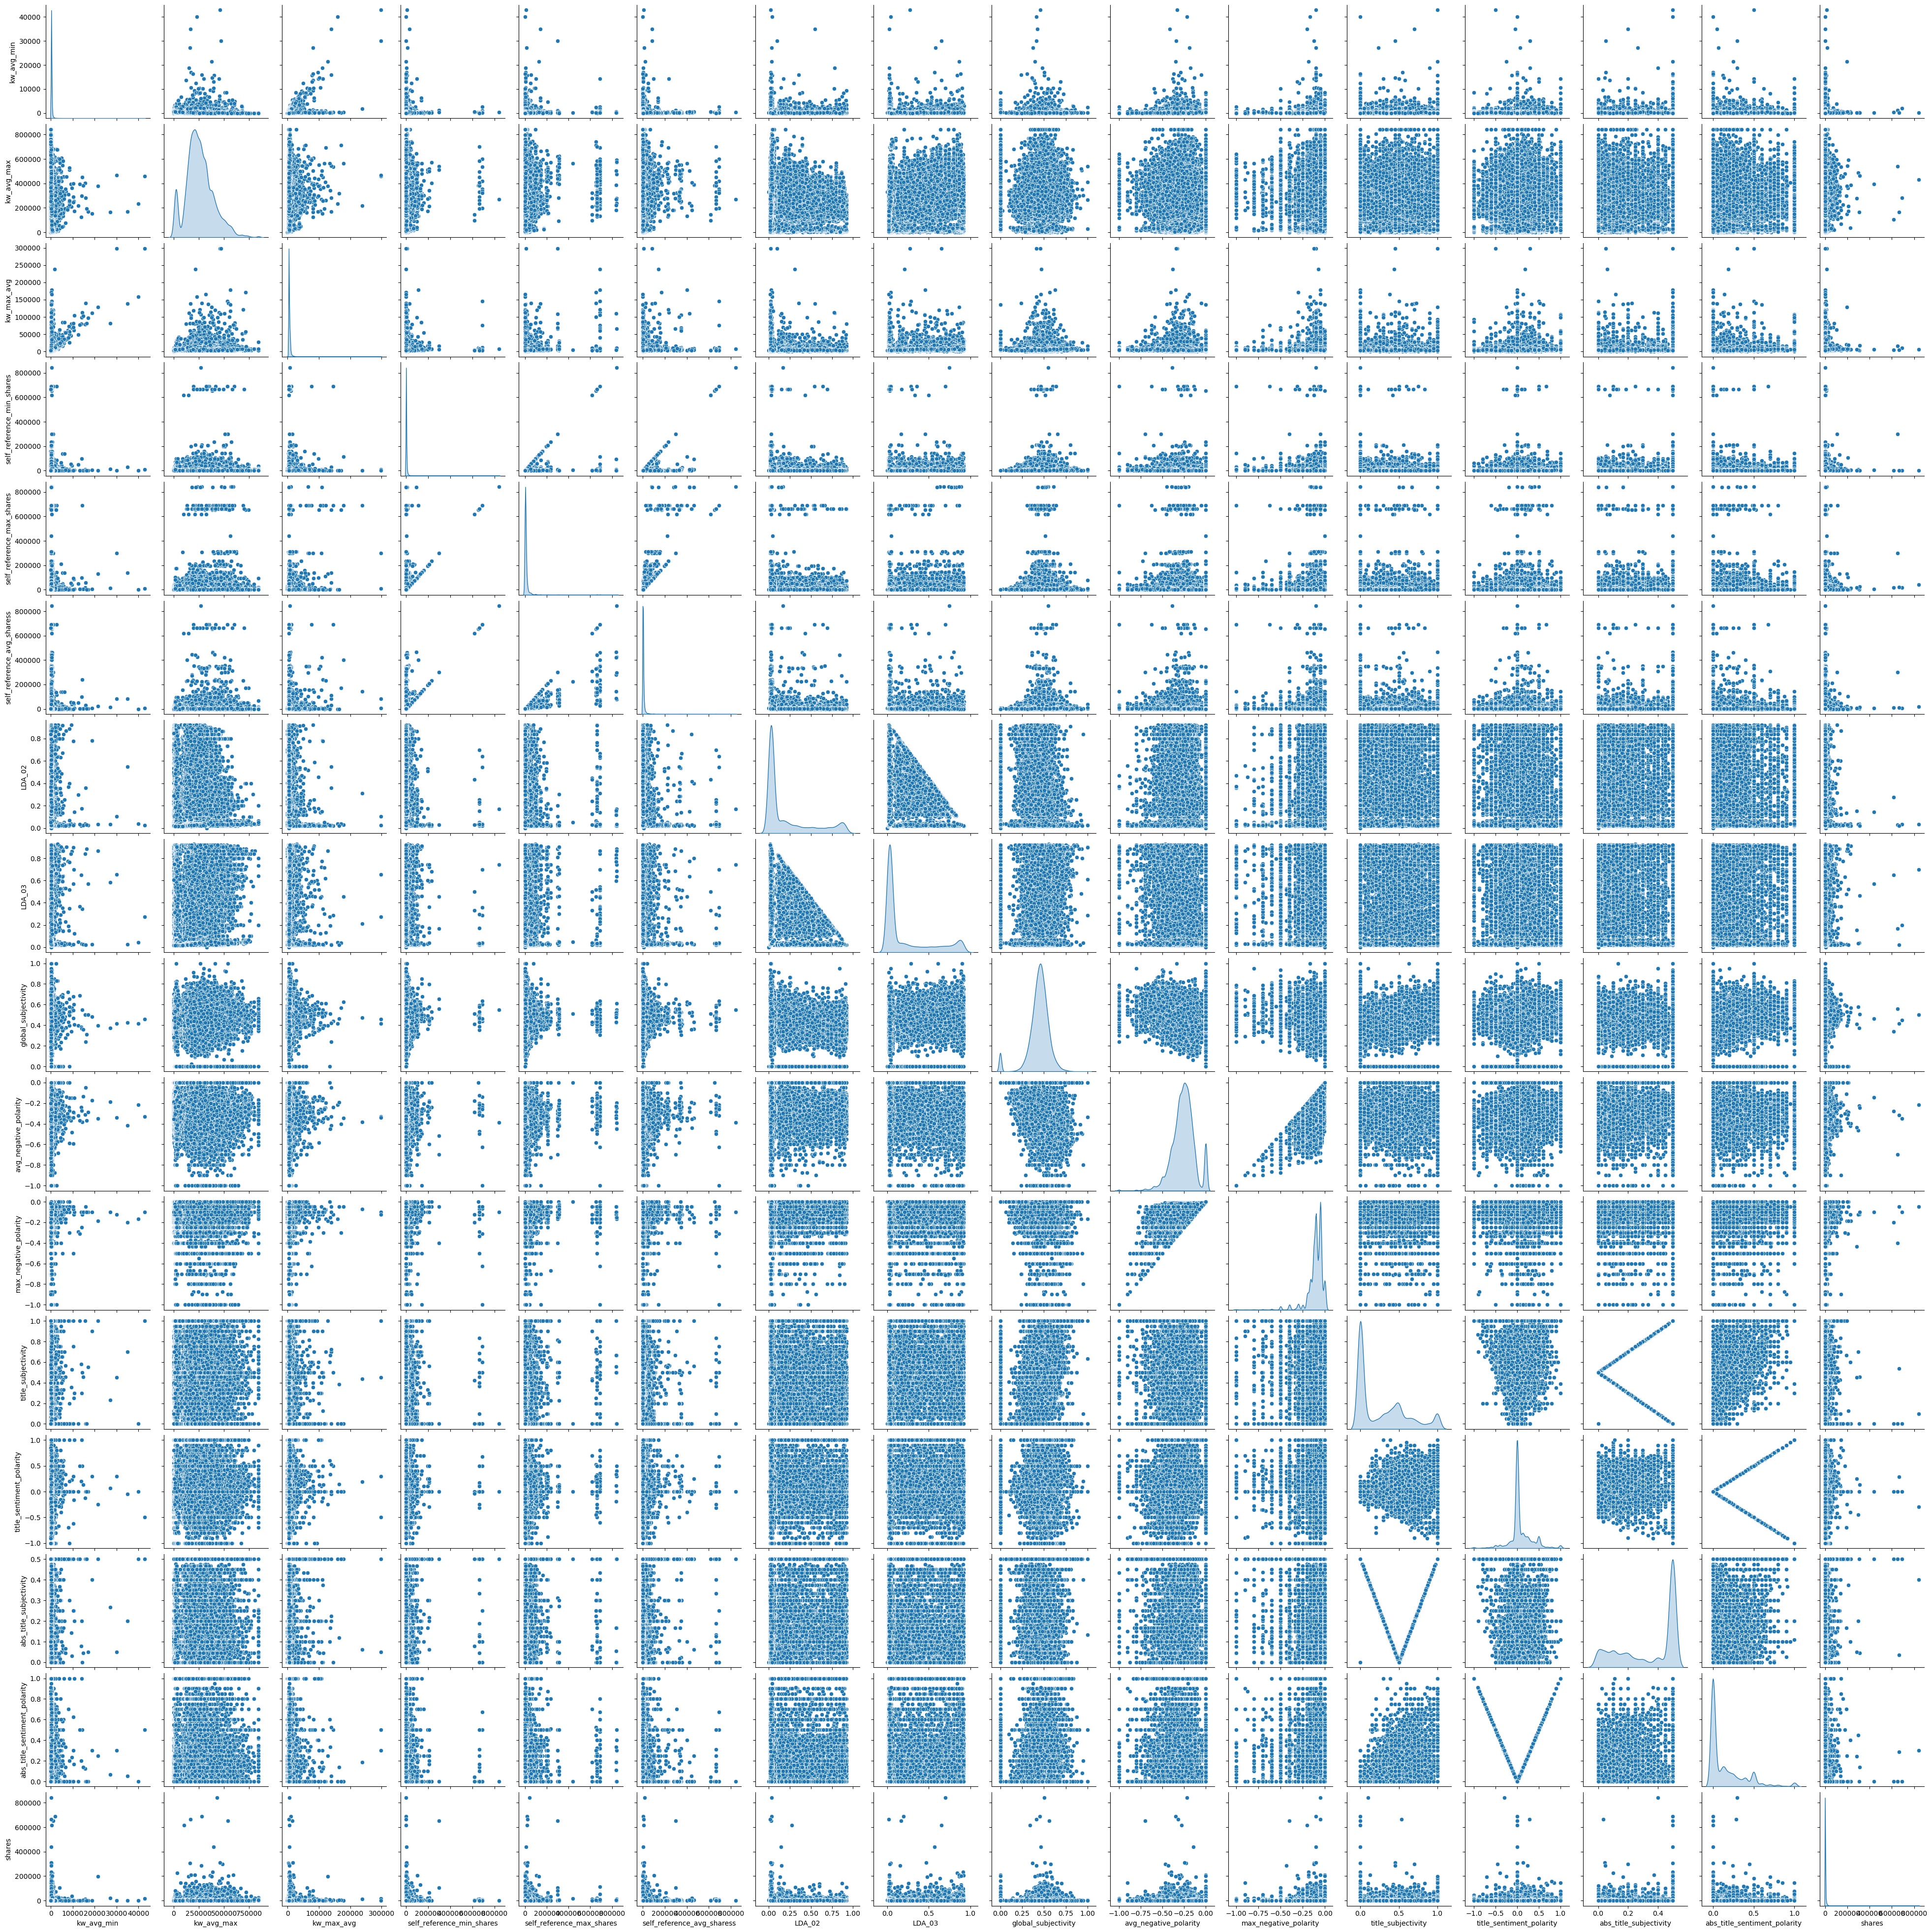

In [39]:
#Perform Bivariate Analysis
bivariate_analysis(df)

The project involves loading and preprocessing the dataset, handling missing values, detecting and addressing skewness,
and conducting exploratory data analysis (EDA) using univariate, bivariate, and multivariate visualizations. 
Feature selection is performed before splitting the data into training and testing sets. Five regression models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Regressor) are implemented and evaluated using R² Score, MSE, and MAE.
The best-performing model is selected, hyperparameter tuning is applied, and the final model is saved for future use.


In [42]:
#Define target and features
X = df_filtered.drop(columns=['shares'])  # Features
y = df_filtered['shares']  # Target variable

In [44]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Shape:", X_train.shape, "Test Shape:",X_test.shape)

Train Shape: (31715, 14) Test Shape: (7929, 14)


In [46]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (31715, 14)
X_test shape: (7929, 14)


In [48]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [50]:
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()

if isinstance(X_test, pd.Series):
    X_test = X_test.to_frame()

In [52]:
print(X_train.isnull().sum().sum())  # Count total missing values
print(X_train.dtypes)  # Ensure all columns are numeric

0
url                              object
kw_avg_min                      float64
kw_avg_max                      float64
kw_max_avg                      float64
self_reference_min_shares       float64
LDA_02                          float64
LDA_03                          float64
global_subjectivity             float64
avg_negative_polarity           float64
max_negative_polarity           float64
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
dtype: object


In [54]:
print("X_train columns:",X_train.columns)
print("X_test columns:",X_test.columns)

X_train columns: Index(['url', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'self_reference_min_shares', 'LDA_02', 'LDA_03', 'global_subjectivity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')
X_test columns: Index(['url', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'self_reference_min_shares', 'LDA_02', 'LDA_03', 'global_subjectivity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')


In [56]:
#from sklearn.preprocessing import StandardScaler

In [58]:
#Ensure only numeric columns are selected
numeric_cols = X_train.select_dtypes(include=['number']).columns

In [60]:
#Initialize StandardScaler
scaler = StandardScaler()

In [62]:
#Apply Standardization
X_train_scaled = X_train.copy()
X_test_scaled=X_test.copy()

In [64]:
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [66]:
#Check results
print(X_train_scaled.head())
print(X_test_scaled.head())

                                                     url  kw_avg_min  \
19837  http://mashable.com/2014/02/04/apple-iphone-st...    0.284130   
904    http://mashable.com/2013/01/23/bloomberg-billi...    0.805072   
23876  http://mashable.com/2014/04/21/marvel-universe...   -0.802391   
22966  http://mashable.com/2014/04/04/elder-scrolls-o...   -0.156800   
4705     http://mashable.com/2013/04/01/the-freedom-bay/    1.522922   

       kw_avg_max  kw_max_avg  self_reference_min_shares    LDA_02    LDA_03  \
19837    0.607631    0.474254                  -0.129058 -0.792557  1.284152   
904     -2.083228   -1.070686                  -1.735894  1.632852 -0.532246   
23876    0.645309   -0.361425                   1.103662  1.497014  0.902812   
22966    0.651102    0.225090                  -1.735894 -0.795385 -0.775129   
4705    -0.566309   -0.709985                  -1.735894 -0.547997 -0.532005   

       global_subjectivity  avg_negative_polarity  max_negative_polarity  \
19837     

In [68]:
#Hyperparameter Tuning with RandomizedSearchCV
rf = RandomForestRegressor()
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1,2,4]
}

In [70]:
#Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of random samples to test
    cv=5,       # 5-fold cross-validation
    verbose=2,  # Show progress
    random_state=42, 
    n_jobs=-1   
)

In [72]:
print(X_train_scaled.dtypes)

url                              object
kw_avg_min                      float64
kw_avg_max                      float64
kw_max_avg                      float64
self_reference_min_shares       float64
LDA_02                          float64
LDA_03                          float64
global_subjectivity             float64
avg_negative_polarity           float64
max_negative_polarity           float64
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
dtype: object


In [74]:
print(X_train_scaled.shape, y_train.shape)

(31715, 14) (31715,)


In [76]:
print(rf.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [78]:
print(param_dist)  # Ensure valid parameter ranges

{'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [80]:
print(X_train_scaled.shape, y_train.shape)  
print(type(X_train_scaled),type(y_train))

(31715, 14) (31715,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [82]:
#import json
print(json.dumps(param_dist, indent=4))  # Ensure no invalid values

{
    "n_estimators": [
        100,
        200,
        300
    ],
    "max_depth": [
        10,
        20,
        null
    ],
    "min_samples_split": [
        2,
        5,
        10
    ],
    "min_samples_leaf": [
        1,
        2,
        4
    ]
}


In [84]:
print(X_train_scaled.info())  # Data types & missing values
print(y_train.isnull().sum())  # Missing values in target

<class 'pandas.core.frame.DataFrame'>
Index: 31715 entries, 19837 to 15795
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           31715 non-null  object 
 1   kw_avg_min                    31715 non-null  float64
 2   kw_avg_max                    31715 non-null  float64
 3   kw_max_avg                    31715 non-null  float64
 4   self_reference_min_shares     31715 non-null  float64
 5   LDA_02                        31715 non-null  float64
 6   LDA_03                        31715 non-null  float64
 7   global_subjectivity           31715 non-null  float64
 8   avg_negative_polarity         31715 non-null  float64
 9   max_negative_polarity         31715 non-null  float64
 10  title_subjectivity            31715 non-null  float64
 11  title_sentiment_polarity      31715 non-null  float64
 12  abs_title_subjectivity        31715 non-null  float64
 13  ab

In [86]:
print(X_train_scaled.dtypes)  # Check data types
print(y_train.dtypes)  # Check if y_train is numeric

url                              object
kw_avg_min                      float64
kw_avg_max                      float64
kw_max_avg                      float64
self_reference_min_shares       float64
LDA_02                          float64
LDA_03                          float64
global_subjectivity             float64
avg_negative_polarity           float64
max_negative_polarity           float64
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
dtype: object
float64


In [88]:
X_train_scaled = X_train_scaled.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [90]:
X_train_scaled = X_train_scaled.fillna(X_train_scaled.mean(numeric_only=True))
y_train = y_train.fillna(y_train.mean())

In [92]:
print(hasattr(rf_random, "best_estimator_"))  # Should return True

False


In [94]:
print(X_train.shape, y_train.shape)

(31715, 14) (31715,)


In [96]:
y_train = y_train.values.ravel()

In [98]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [100]:
#import pandas as pd

X_train = pd.DataFrame(X_train)  # Convert back to DataFrame
y_train = pd.Series(y_train)  # Convert back to Series

X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

In [102]:
# Ensure rf_random is fitted before accessing best_estimator_
if not hasattr(rf_random, "best_estimator_"):
    rf_random.fit(X_train_scaled, y_train)

# Now best_estimator_ should exist
best_rf = rf_random.best_estimator_
best_rf.fit(X_train_scaled, y_train)  # Fit the best model if needed



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [103]:
#Best Model Selection
best_rf = rf_random.best_estimator_
best_rf.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [106]:
print(hasattr(best_rf,"fit"))
print(hasattr(best_rf,"predict"))

True
True


In [108]:
print(hasattr(best_rf, "n_estimators"))  

True


In [110]:
print(X_test_scaled.shape)  
print(type(X_test_scaled))  
print(X_test_scaled.isnull().sum().sum())

(7929, 14)
<class 'pandas.core.frame.DataFrame'>
0


In [112]:
print(X_test_scaled.dtypes)
print(X_test_scaled.select_dtypes(exclude=['number']).head())

url                              object
kw_avg_min                      float64
kw_avg_max                      float64
kw_max_avg                      float64
self_reference_min_shares       float64
LDA_02                          float64
LDA_03                          float64
global_subjectivity             float64
avg_negative_polarity           float64
max_negative_polarity           float64
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
dtype: object
                                                     url
32340  http://mashable.com/2014/09/08/safest-cabbies-...
10480   http://mashable.com/2013/07/25/3d-printed-rifle/
15370  http://mashable.com/2013/10/30/digital-dinosau...
31592  http://mashable.com/2014/08/27/homer-simpson-i...
198    http://mashable.com/2013/01/10/creepy-robotic-...


In [114]:
print(X_test_scaled.isnull().sum())

url                             0
kw_avg_min                      0
kw_avg_max                      0
kw_max_avg                      0
self_reference_min_shares       0
LDA_02                          0
LDA_03                          0
global_subjectivity             0
avg_negative_polarity           0
max_negative_polarity           0
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
dtype: int64


In [116]:
X_test_scaled = X_test_scaled.fillna(0)  

In [118]:
print(set(X_train_scaled.columns) - set(X_test_scaled.columns))
print(set(X_test_scaled.columns) - set(X_train_scaled.columns))

set()
set()


In [120]:
#from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(best_rf)
    print("Model is fitted and ready to predict.")
except:
    print("Error: Model is not trained. Fit it before predicting.")

Model is fitted and ready to predict.


In [122]:
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (31715, 14)
Test shape: (7929, 14)


In [124]:
print(X_test_scaled.dtypes)

url                              object
kw_avg_min                      float64
kw_avg_max                      float64
kw_max_avg                      float64
self_reference_min_shares       float64
LDA_02                          float64
LDA_03                          float64
global_subjectivity             float64
avg_negative_polarity           float64
max_negative_polarity           float64
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
dtype: object


In [126]:
X_test_scaled = X_test_scaled.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric

In [128]:
#import numpy as np

X_test_array = X_test_scaled.to_numpy()  # Convert to NumPy array

print("Missing values in X_test_scaled:", np.isnan(X_test_array).sum())
print("Infinite values in X_test_scaled:", np.isinf(X_test_array).sum())

Missing values in X_test_scaled: 7929
Infinite values in X_test_scaled: 0


In [130]:
#Model Evaluation
y_pred = best_rf.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test,y_pred))

MAE: 0.7155661702570926
MSE: 0.8635545473319456
R2 Score: 0.11354375683193896


In [132]:
# Save Model & Scaler
joblib.dump(best_rf, "best_random_forest_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [134]:
# Load Model & Scaler for Prediction
loaded_model = joblib.load("best_random_forest_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [136]:
print(X_test.shape)
print(X_test.iloc[:5].shape)
print(loaded_scaler.mean_)  

(7929, 14)
(5, 14)
[ 3.92779369e-03 -2.41156921e-05  1.94423550e-03 -2.51768901e-03
 -3.22644535e-03 -6.04486430e-04 -6.43710732e-04  2.82084273e-04
  2.34684222e-03  9.21059535e-04 -1.52421488e-03 -2.82457651e-04
  7.68951758e-04]


In [ ]:
# TESTING WITH UNSEEN DATA

In [290]:
# Load training dataset
train_data_path = (r"C:\Users\uw\Downloads\online_news_popularity.xlsx")  # Update path if needed
df = pd.read_excel(train_data_path)


In [292]:
# Separate features and target variable
X_train = df.drop(columns=['shares'])  # Assuming 'shares' is the target variable
y_train = df['shares']

In [294]:
# Select numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Fill missing values only in numeric columns
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=numeric_cols)

print("Preprocessing completed successfully!")

Preprocessing completed successfully!


In [296]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Select top N features (e.g., top 10)
top_features = feature_importances.nlargest(10).index
X_train_selected = X_train[top_features]

In [298]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Ensure X_train and y_train are defined

# Now save the model
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Trained model and scaler saved successfully.")

Trained model and scaler saved successfully.


In [302]:
joblib.dump(rf, "random_forest_model.pkl")  # Use the correct variable name

['random_forest_model.pkl']

In [304]:
# Define the directory path
save_dir = "/mnt/data"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

print(f"Directory '{save_dir}' is ready for saving files.")

Directory '/mnt/data' is ready for saving files.


In [306]:
# Save the trained model
joblib.dump(rf, "/mnt/data/random_forest_model.pkl")
joblib.dump(scaler, "/mnt/data/scaler.pkl")

print("Trained model and scaler saved successfully.")


Trained model and scaler saved successfully.


In [308]:
# Load unseen data
unseen_data_path = (r"C:\Users\uw\Downloads\online_news_popularity.xlsx") # Update path if needed
unseen_df = pd.read_excel(unseen_data_path)


In [310]:
print(unseen_df.dtypes)

title               object
word_count           int64
num_links            int64
sentiment_score    float64
category            object
shares               int64
dtype: object


In [312]:
numeric_cols = unseen_df.select_dtypes(include=['number']).columns
unseen_df[numeric_cols] = unseen_df[numeric_cols].apply(lambda x: x.fillna(x.median()),axis=0)

In [314]:
print(unseen_df.shape)  # Ensure it has rows and columns
print(unseen_df.isnull().sum())  # Check how many missing values exist

(30, 6)
title              0
word_count         0
num_links          0
sentiment_score    0
category           0
shares             0
dtype: int64


In [316]:
unseen_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [318]:
unseen_df.fillna(unseen_df.select_dtypes(include=['number']).median(),inplace=True)

In [320]:
# Load trained scaler
scaler = joblib.load("/mnt/data/scaler.pkl")

# Select the same important features
unseen_data_selected = unseen_df[top_features]

In [322]:
# Convert back to DataFrame
unseen_data_selected = pd.DataFrame(unseen_data_selected, columns=top_features)

In [324]:
# Load trained model
trained_model = joblib.load("/mnt/data/random_forest_model.pkl")

In [346]:
feature_columns = X_train.columns.tolist()
print("Feature columns:", feature_columns)

Feature columns: ['word_count', 'num_links', 'sentiment_score']


In [348]:
unseen_data_selected = unseen_df[feature_columns]

In [356]:
# Keep only the necessary feature columns
unseen_df = unseen_df[feature_columns]

In [358]:
unseen_df.columns = unseen_df.columns.str.lower().str.strip()
feature_columns = [col.lower().strip() for col in feature_columns]

In [362]:
# Ensure unseen_df is a separate copy
unseen_df = unseen_df.copy()

# Add predictions to the copied DataFrame
unseen_df.loc[:, "Predicted_Shares"] = predictions

# Display first few results
print(unseen_df[["Predicted_Shares"]].head())

   Predicted_Shares
0            4380.0
1            4362.0
2            4472.0
3            4304.0
4            4551.0


In [364]:
print("Columns in unseen_df:", unseen_df.columns.tolist())
print("Expected feature columns:", feature_columns)

Columns in unseen_df: ['word_count', 'num_links', 'sentiment_score', 'Predicted_Shares']
Expected feature columns: ['word_count', 'num_links', 'sentiment_score']
